<a href="https://colab.research.google.com/github/Technozpro/Mini-Project-/blob/main/ML_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [47]:
Output = []
Images = []
Flat_data = []
Images_Path = '/content/drive/MyDrive/Colab Notebooks/images'
Categories =['Laptop', 'Mobile', 'Supercar']


for category in Categories:
  class_num = Categories.index(category)
  path = os.path.join(Images_Path, category)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape) 
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    Flat_data.append(img_resized.flatten())
    Images.append(img_resized)
    Output.append(class_num)

Flat_data = np.array(Flat_data)
Output = np.array(Output)
Images = np.array(Images)

In [48]:
Flat_data[0]

array([0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
       0.99215686])

<BarContainer object of 3 artists>

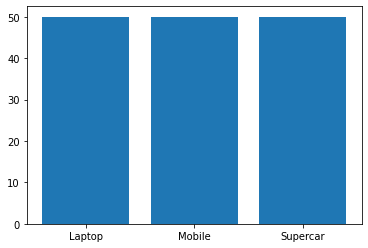

In [49]:
unique,count = np.unique(Output, return_counts=True)
plt.bar(Categories,count)

In [50]:
#Spilting Data Into Training And Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Flat_data,Output,test_size=0.3,random_state=120)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['sigmoid']},
              {'C':[1,10,100,1000],'gamma':['auto','scale'], 'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid, cv=5)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['auto', 'scale'],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2,
       1])

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7333333333333333

In [54]:
confusion_matrix(y_pred,y_test)

array([[11,  3,  0],
       [ 4,  8,  0],
       [ 4,  1, 14]])

In [55]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67        14
           1       0.67      0.67      0.67        12
           2       1.00      0.74      0.85        19

    accuracy                           0.73        45
   macro avg       0.75      0.73      0.73        45
weighted avg       0.78      0.73      0.74        45



In [56]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))


In [57]:
model = pickle.load(open('img_model.p','rb'))

Enter Urlhttp://i01.appmifile.com/v1/MI_18455B3E4DA706226CF7535A58E875F0267/pms_1604992511.27313054.jpg?width=200&height=200
(200, 200, 3)
PREDICIRED OUTPUT:Laptop


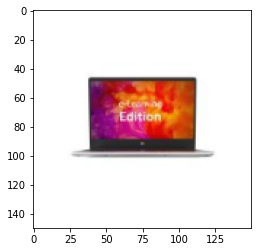

In [58]:
Flat_data = []
url = input('Enter Url')
img = imread(url)
img_resized = resize(img,(150,150,3))
Flat_data.append(img_resized.flatten())
Flat_data = np.array(Flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(Flat_data)
y_out = Categories[y_out[0]]
print(f'PREDICIRED OUTPUT:{y_out}')